# Importing required libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Loading the dataset:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [17]:
# Print all columns:
pd.set_option('display.max_columns',None)

In [18]:
# Showing 5 raws of dataframe:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [19]:
# Get the numbers of rows and columns:
df.shape

(1000, 40)

In [20]:
# Check column of the dataframe:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [21]:
# Get the column datatypes:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [22]:
# Basic information about dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [23]:
# Get a count of the empty values for each column:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [24]:
# Check any missing/null values in the dataset:
df.isnull().values.any()

True

<AxesSubplot:>

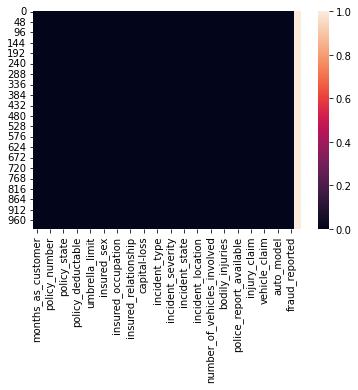

In [25]:
# Checking for null values using heatmap:
sns.heatmap(df.isnull())

In [26]:
# Drop_c39 column:
df.drop('_c39', axis=1, inplace=True)

In [27]:
# Print all of the data types and their unique values:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('____________________________________________')

policy_bind_date : ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-

### Feature Engineering

In [29]:
# Here replace ? with mode.
df['collision_type']= df['collision_type'].str.replace('?','Rear Collision')
df['property_damage']= df['property_damage'].str.replace('?','NO')
df['police_report_available']= df['police_report_available'].str.replace('?','NO')
df['police_report_available']= df['police_report_available'].str.replace('?','NO')

In [57]:
# Here Convert Categories data:
# from policy_bind_date convert to day, month and year
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df.drop('policy_bind_date', axis=1, inplace=True)

In [59]:
# Here Convert Categories data:
# from incident_date convert to day, month and year
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_date_day'] = df['incident_date'].dt.day
df['incident_date_month'] = df['incident_date'].dt.month
df['incident_date_year'] = df['incident_date'].dt.year
df.drop('incident_date', axis=1, inplace=True)

# Data Analysis and Visualization

In [32]:
# Summary statistics.
df.describe().style.background_gradient()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1101000.000000,501214.488000,25126.100000,-26793.700000,11.644000,1.839000,0.992000,1.487000,52761.940000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2297406.598118,71701.610941,27872.187708,28104.096686,6.951373,1.018880,0.820127,1.111335,26401.533190,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1000000.000000,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000,448404.500000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41812.500000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000,466445.500000,0.000000,-23250.000000,12.000000,1.000000,1.000000,1.000000,58055.000000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000,603251.000000,51025.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70592.500000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,10000000.000000,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


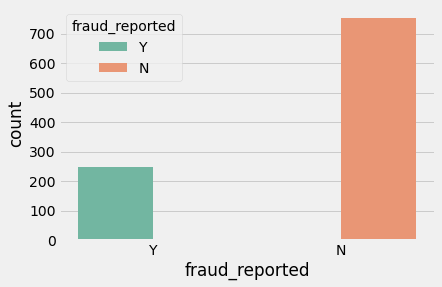

In [34]:
# Display countplot for fraud_reported in data:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported', palette='Set2')

Observation :- In this graph no fraud detect has more than yes.

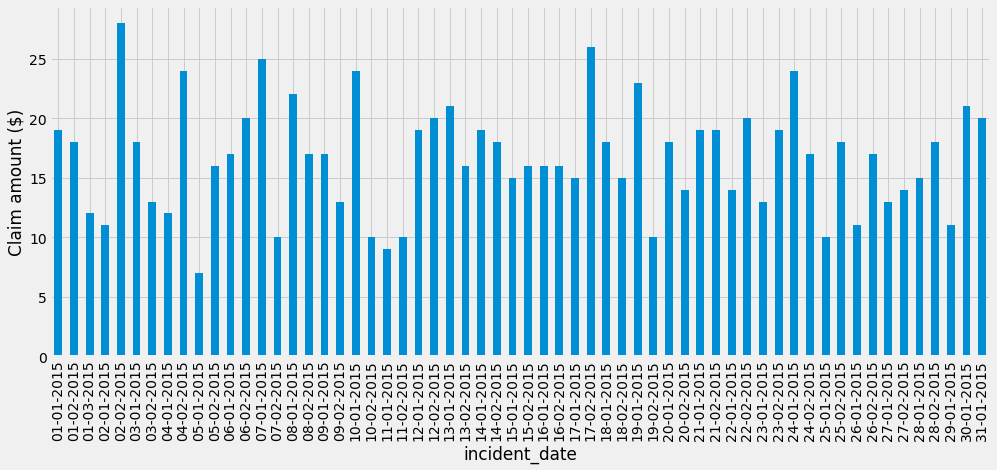

In [36]:
# display for Claim amount ($) in data:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

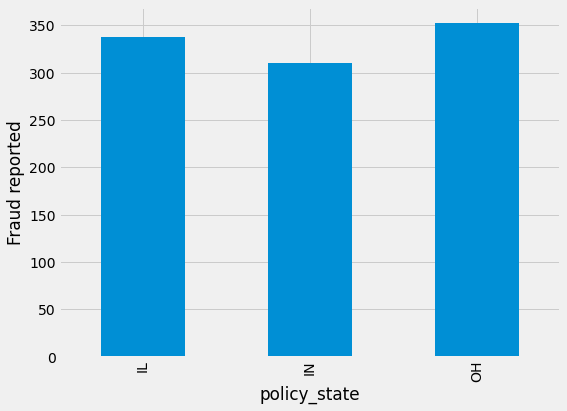

In [37]:
# display for policy_state in data:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

Obsrvation :- here OH and IL has more count in policy_state

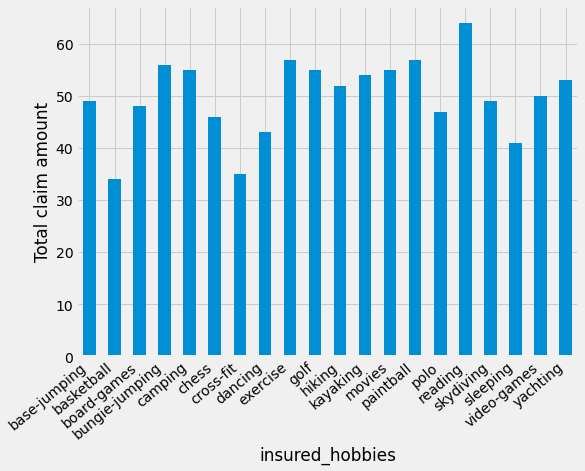

In [38]:
# display for Total claim amount in data:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

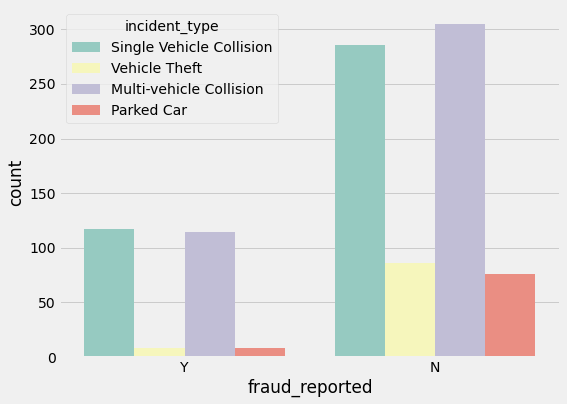

In [42]:
# display countplot for fraud_reported in data:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='incident_type', palette='Set3')

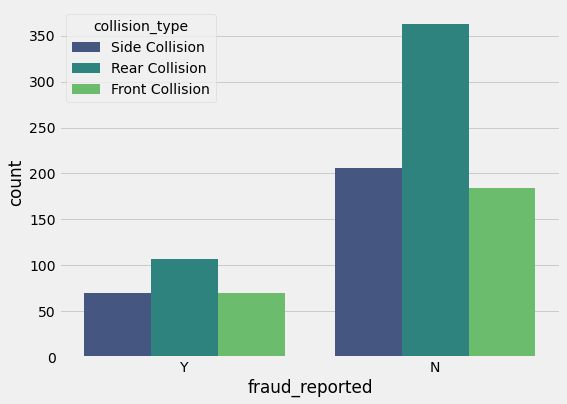

In [46]:
# display countplot for fraud_reported in data:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='collision_type', palette='viridis')

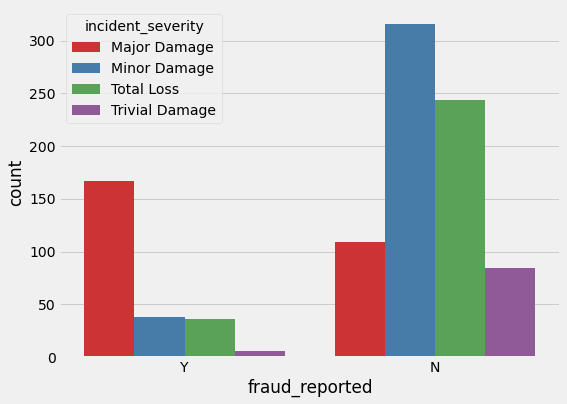

In [47]:
# display countplot for fraud_reported in data:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='incident_severity', palette='Set1')

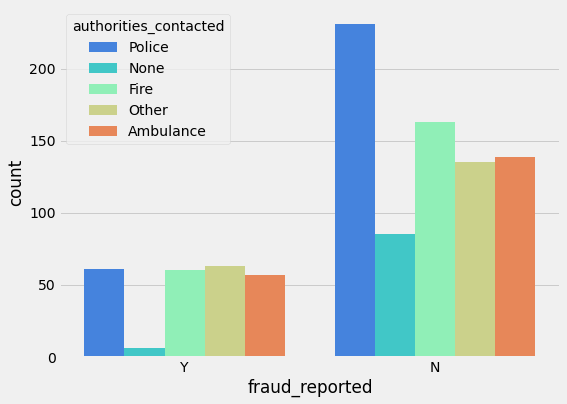

In [49]:
# display countplot for fraud_reported in data:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='authorities_contacted', palette='rainbow')

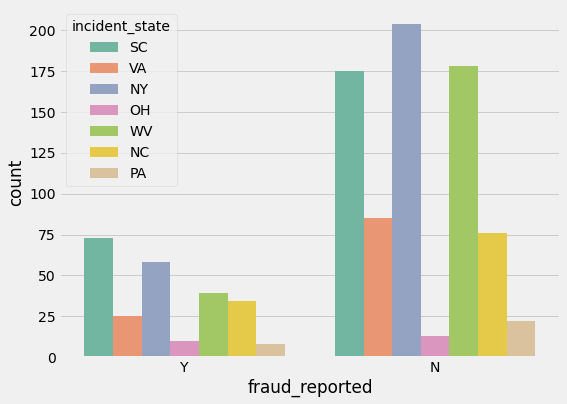

In [51]:
# display countplot for fraud_reported in data:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='incident_state', palette='Set2')

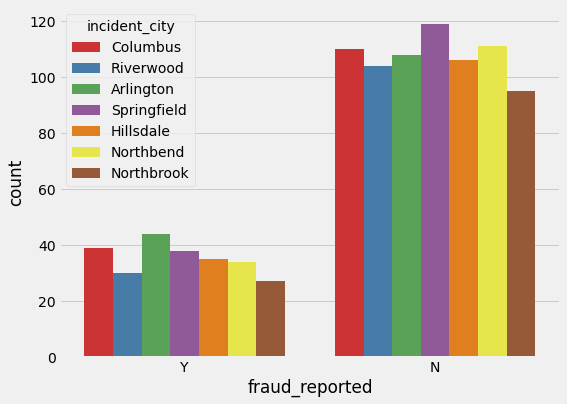

In [53]:
# display countplot for fraud_reported in data:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='incident_city', palette='Set1')

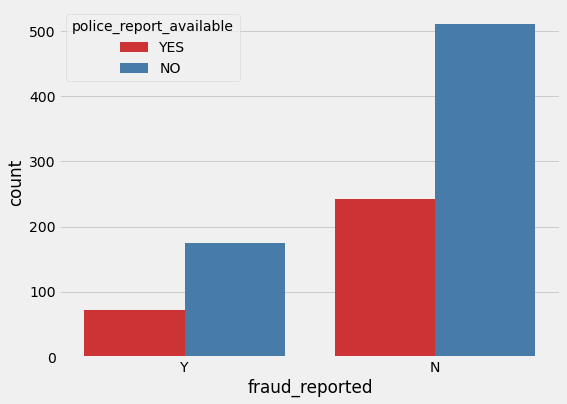

In [54]:
# display countplot for fraud_reported in data:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='police_report_available', palette='Set1')

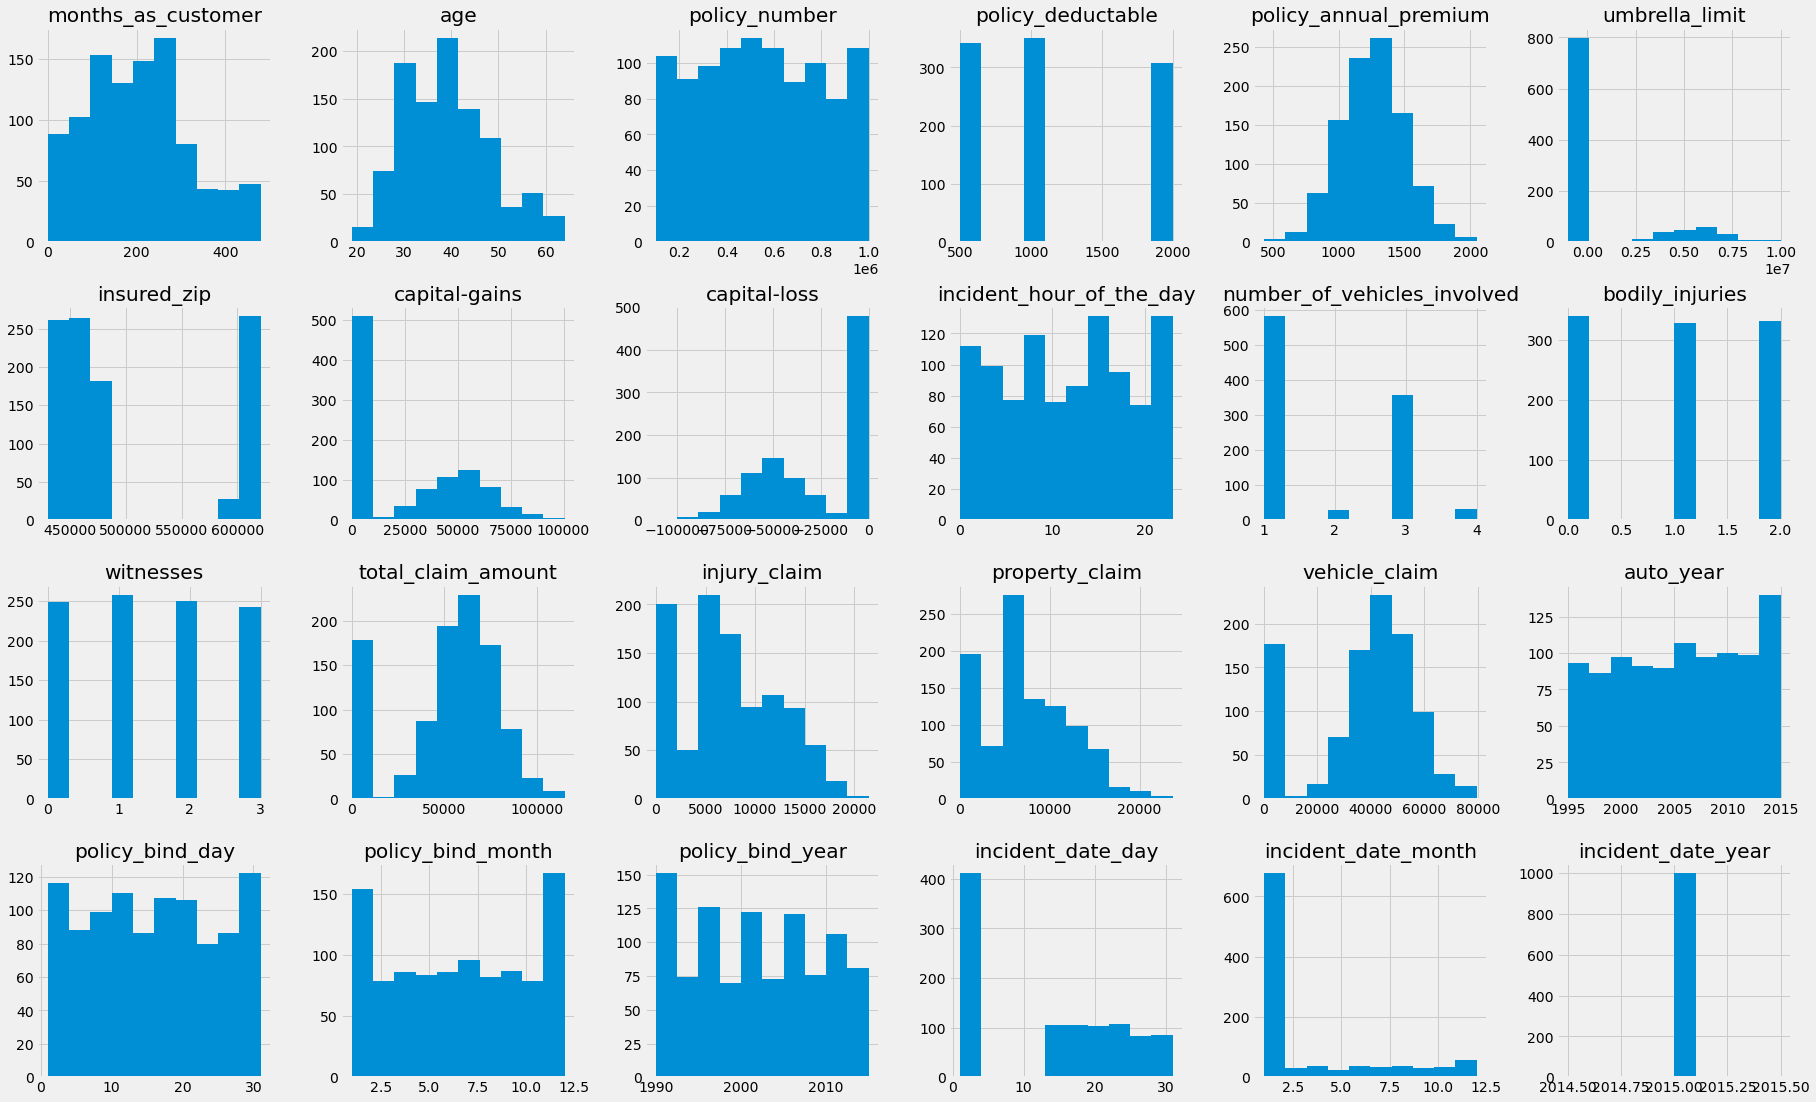

In [73]:
# display histogram:
df.hist(figsize=(28,18), layout=(4,6), sharex=False);

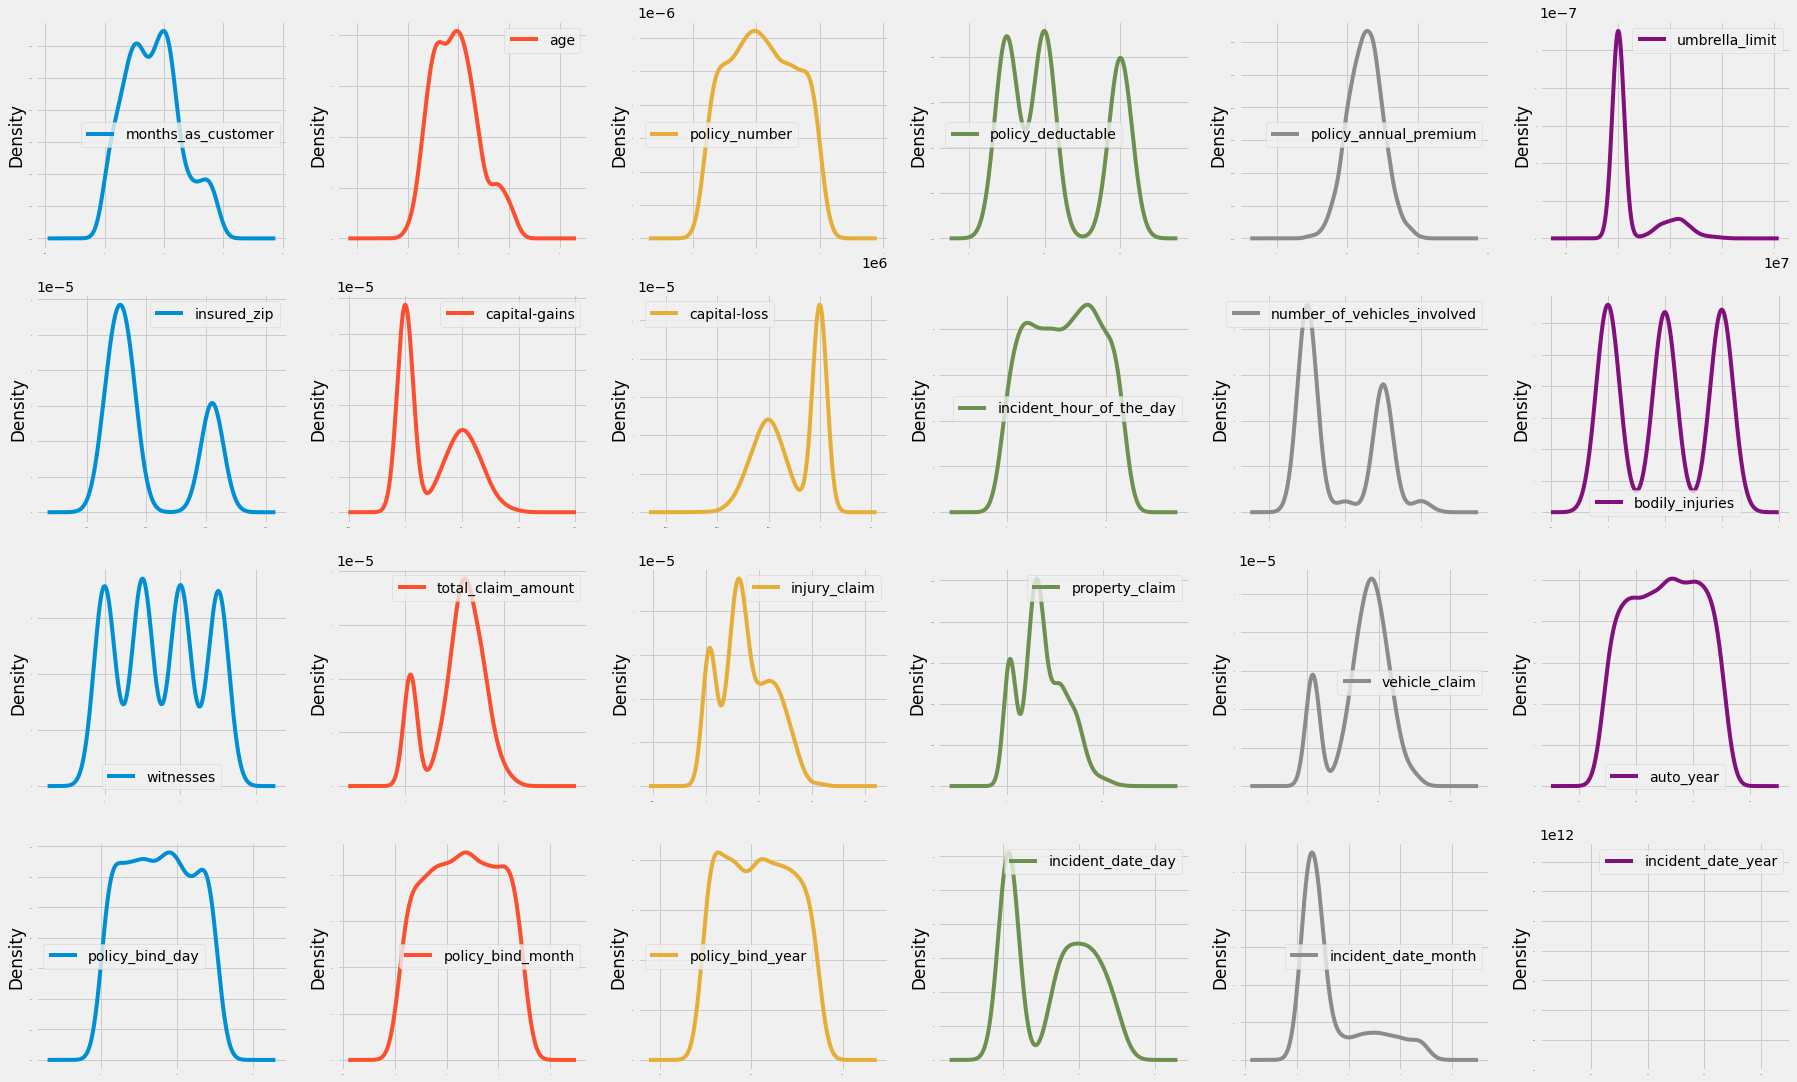

In [75]:
# Let's check desity plot:
df.plot(kind='density', subplots=True, layout=(4,6), sharex=False, legend=True, fontsize=1, figsize=(28,18))
plt.show()

# Remove skewness and outliers

In [78]:
# Dropping the Price column:
data = df.drop(["fraud_reported"], axis=1)

In [79]:
# Here convert into Categorical Data and Numerical Data:
categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

In [80]:
categorical_data.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX


In [81]:
numerical_data.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_date_day,incident_date_month,incident_date_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,17,10,2014,25,1,2015
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,27,6,2006,21,1,2015
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,9,6,2000,22,2,2015
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,25,5,1990,1,10,2015
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,6,6,2014,17,2,2015


In [83]:
#Check skewness
numerical_data.skew().sort_values(ascending=False)

umbrella_limit                 1.806712
incident_date_month            1.375894
insured_zip                    0.816554
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
injury_claim                   0.264811
incident_date_day              0.059111
policy_bind_year               0.052511
policy_number                  0.038991
policy_bind_day                0.024372
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
incident_date_year             0.000000
policy_bind_month             -0.029321
incident_hour_of_the_day      -0.035584
auto_year                     -0.048289
capital-loss                  -0.391472
total_claim_amount            -0.594582
vehicle_claim                 -0.621098
dtype: float64

In [86]:
#Remove skewness using log transform and sqrt method.
import numpy as np
df['umbrella_limit']=np.sqrt(df['umbrella_limit'])

In [87]:
#Check skewness
df.skew().sort_values(ascending=False)

umbrella_limit                 1.578304
incident_date_month            1.375894
insured_zip                    0.816554
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
injury_claim                   0.264811
incident_date_day              0.059111
policy_bind_year               0.052511
policy_number                  0.038991
policy_bind_day                0.024372
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
incident_date_year             0.000000
policy_bind_month             -0.029321
incident_hour_of_the_day      -0.035584
auto_year                     -0.048289
capital-loss                  -0.391472
total_claim_amount            -0.594582
vehicle_claim                 -0.621098
dtype: float64

months_as_customer                 AxesSubplot(0.08,0.764286;0.18913x0.115714)
age                            AxesSubplot(0.306957,0.764286;0.18913x0.115714)
policy_number                  AxesSubplot(0.533913,0.764286;0.18913x0.115714)
policy_deductable               AxesSubplot(0.76087,0.764286;0.18913x0.115714)
policy_annual_premium              AxesSubplot(0.08,0.625429;0.18913x0.115714)
umbrella_limit                 AxesSubplot(0.306957,0.625429;0.18913x0.115714)
insured_zip                    AxesSubplot(0.533913,0.625429;0.18913x0.115714)
capital-gains                   AxesSubplot(0.76087,0.625429;0.18913x0.115714)
capital-loss                       AxesSubplot(0.08,0.486571;0.18913x0.115714)
incident_hour_of_the_day       AxesSubplot(0.306957,0.486571;0.18913x0.115714)
number_of_vehicles_involved    AxesSubplot(0.533913,0.486571;0.18913x0.115714)
bodily_injuries                 AxesSubplot(0.76087,0.486571;0.18913x0.115714)
witnesses                          AxesSubplot(0.08,

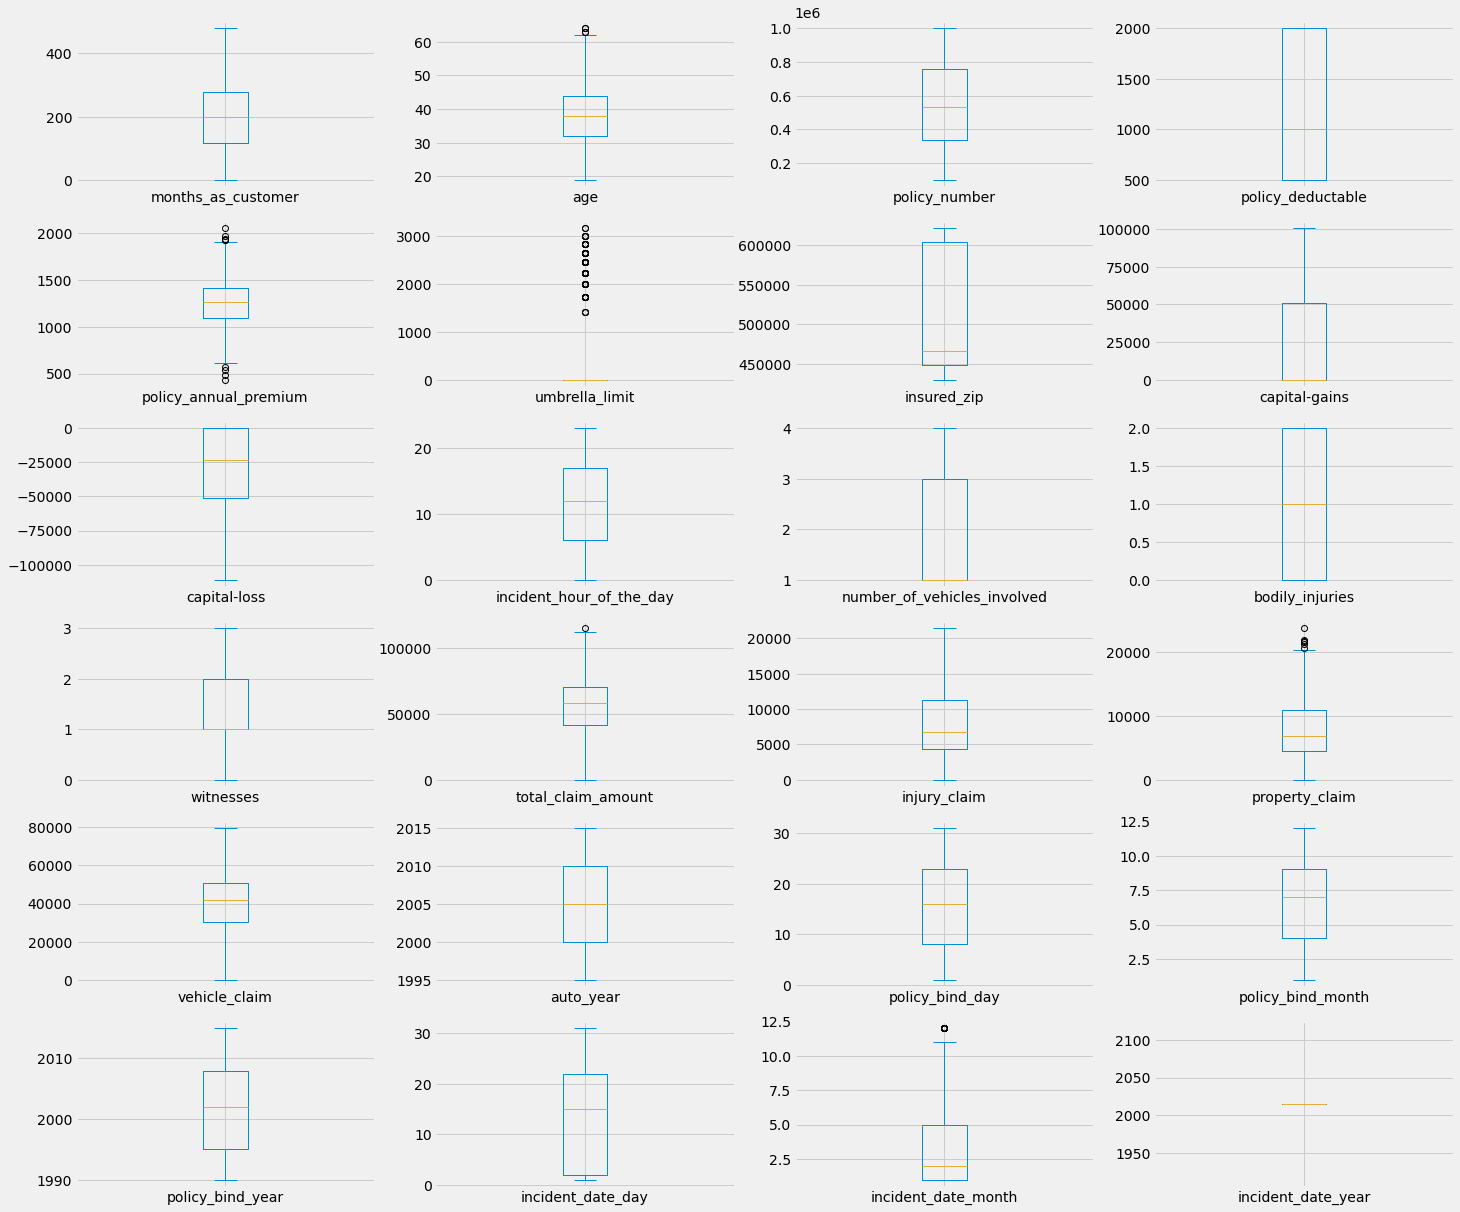

In [91]:
#checking outliers with boxplot.
numerical_data.plot(kind='box', subplots=True, layout=(6,4), figsize=(22,20))

In [94]:
#Lets quantify
from scipy.stats import zscore
(np.abs(zscore(numerical_data))<3).all()

months_as_customer              True
age                             True
policy_number                   True
policy_deductable               True
policy_annual_premium          False
umbrella_limit                 False
insured_zip                     True
capital-gains                   True
capital-loss                   False
incident_hour_of_the_day        True
number_of_vehicles_involved     True
bodily_injuries                 True
witnesses                       True
total_claim_amount              True
injury_claim                    True
property_claim                 False
vehicle_claim                   True
auto_year                       True
policy_bind_day                 True
policy_bind_month               True
policy_bind_year                True
incident_date_day               True
incident_date_month             True
incident_date_year             False
dtype: bool

In [95]:
#detecting outliers
from scipy.stats import zscore
z = np.abs(zscore(numerical_data))
print(np.where(z>3))

(array([229, 248, 500, 763, 807], dtype=int64), array([ 4,  4, 15,  4,  8], dtype=int64))


In [99]:
df.shape

(1000, 43)

In [104]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
13,incident_location,1000
17,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
16,auto_make,14
12,incident_city,7
3,insured_education_level,7
11,incident_state,7
6,insured_relationship,6
10,authorities_contacted,5


In [105]:
# droping columns based on above result
df.drop(['incident_location','auto_model','insured_hobbies','insured_occupation','policy_number'],axis=1,inplace=True)

# Label Encoder

In [109]:
# Hrer Converting categorical values with LabelEncoder:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
list1 = ["policy_state","policy_csl","insured_sex","insured_education_level","insured_relationship","incident_type","collision_type","incident_severity","authorities_contacted","incident_state","incident_city","property_damage","police_report_available","auto_make","fraud_reported"]
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))
    
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_date_day,incident_date_month,incident_date_year
0,328,48,2,1,1000,1406.91,0.000000,466132,1,4,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,2004,1,17,10,2014,25,1,2015
1,228,42,1,1,2000,1197.22,2236.067977,468176,1,4,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,2007,1,27,6,2006,21,1,2015
2,134,29,2,0,2000,1413.14,2236.067977,430632,0,6,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,2007,0,9,6,2000,22,2,2015
3,256,41,0,1,2000,1415.74,2449.489743,608117,0,6,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,2014,1,25,5,1990,1,10,2015
4,228,44,0,2,1000,1583.91,2449.489743,610706,1,0,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,2009,0,6,6,2014,17,2,2015


# Correlation

In [111]:
# Correlation of data:
corr = df.corr(method='pearson')
corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_date_day,incident_date_month,incident_date_year
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.010347,0.017895,0.060925,-0.000833,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,-0.000292,0.020544,0.051728,0.005750,-0.048276,-0.011092,0.024659,NaN
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.009046,0.025604,0.073337,0.000969,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.001354,0.012143,0.053869,0.015501,-0.037444,-0.006131,0.023404,NaN
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.023199,0.008777,-0.020481,-0.034327,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,0.002114,0.029432,0.002277,0.071450,-0.007276,0.014745,0.023643,NaN
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.017660,0.006879,-0.010757,0.009153,-0.030063,0.005249,-0.034612,0.011997,0.020641,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,-0.033082,-0.037190,0.018973,-0.045345,-0.016466,-0.004156,-0.011794,NaN
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.004846,0.004545,-0.009733,0.015217,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,0.026105,0.014817,0.009164,-0.050416,-0.049598,-0.018160,-0.006418,NaN
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.003913,0.032354,0.038853,-0.019715,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.049226,-0.014480,-0.025183,-0.035355,0.001249,0.014835,0.021559,NaN
umbrella_limit,0.010347,0.009046,-0.023199,0.017660,0.004846,-0.003913,1.000000,0.013069,0.014031,-0.020061,0.087235,-0.046218,-0.019277,0.022068,0.015511,0.004037,0.028233,-0.076148,0.010558,-0.020226,-0.026091,-0.078502,0.035976,-0.009247,-0.050476,-0.037800,-0.044092,-0.019572,-0.036440,0.001684,0.008107,0.058870,-0.044281,0.005445,0.052901,-0.028418,0.041892,NaN
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.013069,1.000000,-0.036942,0.016079,-0.002355,0.006303,0.049372,-0.010840,-0.016882,-0.023855,-0.017548,-0.047669,-0.017532,0.008274,0.027448,0.023861,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,-0.032736,0.019368,-0.039867,0.015864,-0.001100,0.019095,0.005461,NaN
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.014031,-0.036942,1.000000,0.009002,0.002855,-0.020494,-0.021705,0.009952,-0.014293,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.028247,0.030873,0.040713,-0.004033,-0.032891,-0.007280,0.024227,NaN
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-

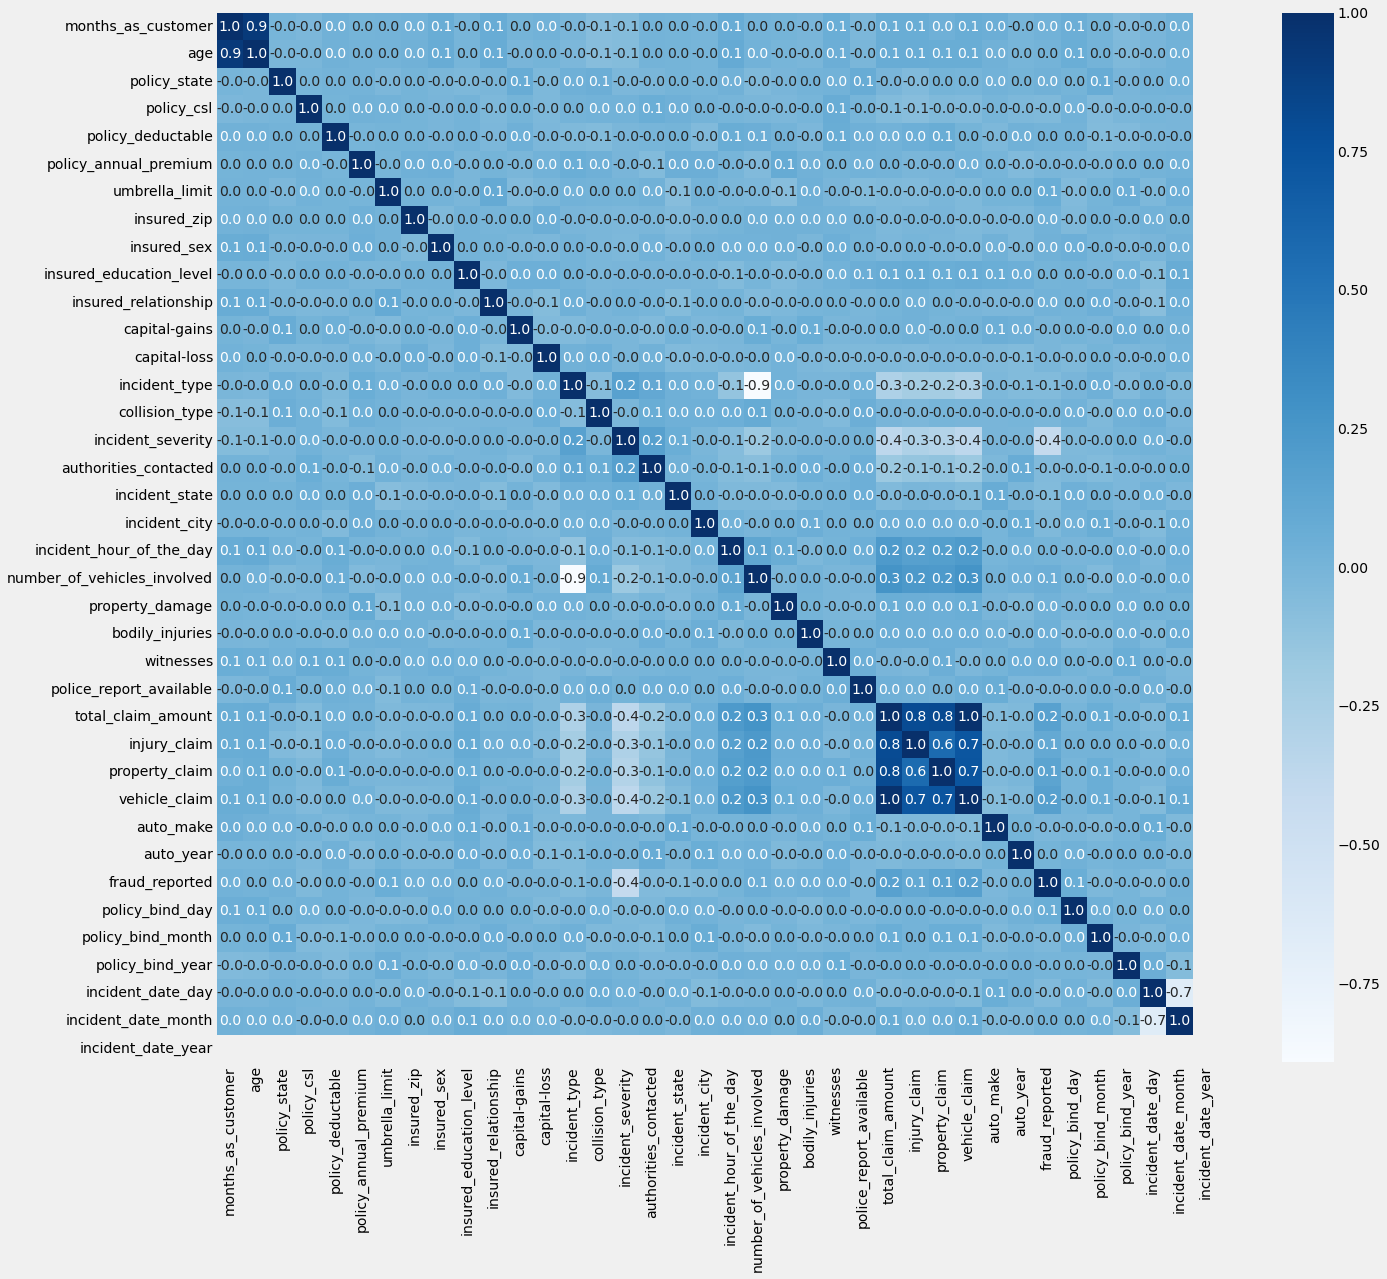

In [118]:
# display heatmap:
plt.figure(figsize = (20,18))
sns.heatmap(df.corr(), annot = True, cmap = "Blues", fmt='.1f')
plt.show()

#### Observation :- In cor matrix total claim amount, injury claim and property claim, vehical claim is highly correlate with each other

In [123]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = "mean")
df['umbrella_limit'] = imp.fit_transform(df['umbrella_limit'].values.reshape(-1,1))

# MultiCollinearity with Variance Inflation Factor (VIF)

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
X = df.drop(columns=['fraud_reported'],axis=1)
Y = df['fraud_reported']

In [126]:
def calc_vif():
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    print(vif)

In [127]:
calc_vif()

                       Features    VIF Factor
0            months_as_customer  6.836696e+00
1                           age  6.853269e+00
2                  policy_state  1.036219e+00
3                    policy_csl  1.027347e+00
4             policy_deductable  1.041044e+00
5         policy_annual_premium  1.037431e+00
6                umbrella_limit  1.039354e+00
7                   insured_zip  1.024464e+00
8                   insured_sex  1.029367e+00
9       insured_education_level  1.044066e+00
10         insured_relationship  1.041284e+00
11                capital-gains  1.035678e+00
12                 capital-loss  1.039313e+00
13                incident_type  5.117229e+00
14               collision_type  1.046177e+00
15            incident_severity  1.196177e+00
16        authorities_contacted  1.084639e+00
17               incident_state  1.039582e+00
18                incident_city  1.028923e+00
19     incident_hour_of_the_day  1.091571e+00
20  number_of_vehicles_involved  5

In [129]:
#drop unnecessary column that given same imformation.
df.drop(columns=['injury_claim','property_claim'],axis=1,inplace=True)

# Data Preprocessing

In [130]:
x = df.drop(columns=['fraud_reported'],axis=1)
y = df['fraud_reported']

In [131]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,vehicle_claim,auto_make,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_date_day,incident_date_month,incident_date_year
0,328,48,2,1,1000,1406.91,0.000000,466132,1,4,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,52080,10,2004,17,10,2014,25,1,2015
1,228,42,1,1,2000,1197.22,2236.067977,468176,1,4,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,3510,8,2007,27,6,2006,21,1,2015
2,134,29,2,0,2000,1413.14,2236.067977,430632,0,6,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,23100,4,2007,9,6,2000,22,2,2015
3,256,41,0,1,2000,1415.74,2449.489743,608117,0,6,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,50720,3,2014,25,5,1990,1,10,2015
4,228,44,0,2,1000,1583.91,2449.489743,610706,1,0,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,4550,0,2009,6,6,2014,17,2,2015


In [132]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [133]:
print(x.shape, y.shape)

(1000, 35) (1000,)


# Scaling the data

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.07813958,  0.99083647,  1.18717314, ...,  1.14160272,
        -0.73503976,  0.        ],
       [ 0.2089946 ,  0.33407345, -0.01685641, ...,  0.75838596,
        -0.73503976,  0.        ],
       [-0.60800168, -1.08891308,  1.18717314, ...,  0.85419015,
        -0.42966387,  0.        ],
       ...,
       [-0.64276748, -0.54161057,  1.18717314, ...,  0.94999434,
        -0.73503976,  0.        ],
       [ 2.20802805,  2.52328351, -1.22088596, ...,  1.23740691,
        -0.42966387,  0.        ],
       [ 2.19064515,  2.3043625 ,  1.18717314, ...,  1.23740691,
        -0.42966387,  0.        ]])

# Since the outcome has only two variables we will use binary classification model.

In [136]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.svm import SVC
svc = SVC()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training process begins

#### Finding best random_state

In [161]:
model = [lr,rfc,dtc,svc,gnb]
maxAcc_score = 0
for r_state in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = r_state)
    for i in model:
        i.fit(x_train,y_train)
        pred_test = i.predict(x_test)
        acc_sc = accuracy_score(y_test,pred_test)
        print("Accuracy score correspond to random state ",r_state,"is",acc_sc)
        if acc_sc > maxAcc_score:
            maxAcc_score = acc_sc
            final_state = r_state
            final_model = i

Accuracy score correspond to random state  0 is 0.715
Accuracy score correspond to random state  0 is 0.775
Accuracy score correspond to random state  0 is 0.705
Accuracy score correspond to random state  0 is 0.715
Accuracy score correspond to random state  0 is 0.7
Accuracy score correspond to random state  1 is 0.73
Accuracy score correspond to random state  1 is 0.76
Accuracy score correspond to random state  1 is 0.74
Accuracy score correspond to random state  1 is 0.73
Accuracy score correspond to random state  1 is 0.7
Accuracy score correspond to random state  2 is 0.755
Accuracy score correspond to random state  2 is 0.775
Accuracy score correspond to random state  2 is 0.64
Accuracy score correspond to random state  2 is 0.755
Accuracy score correspond to random state  2 is 0.725
Accuracy score correspond to random state  3 is 0.745
Accuracy score correspond to random state  3 is 0.77
Accuracy score correspond to random state  3 is 0.73
Accuracy score correspond to random sta

Accuracy score correspond to random state  31 is 0.81
Accuracy score correspond to random state  31 is 0.71
Accuracy score correspond to random state  31 is 0.785
Accuracy score correspond to random state  31 is 0.76
Accuracy score correspond to random state  32 is 0.74
Accuracy score correspond to random state  32 is 0.725
Accuracy score correspond to random state  32 is 0.73
Accuracy score correspond to random state  32 is 0.745
Accuracy score correspond to random state  32 is 0.72
Accuracy score correspond to random state  33 is 0.75
Accuracy score correspond to random state  33 is 0.775
Accuracy score correspond to random state  33 is 0.735
Accuracy score correspond to random state  33 is 0.755
Accuracy score correspond to random state  33 is 0.715
Accuracy score correspond to random state  34 is 0.71
Accuracy score correspond to random state  34 is 0.77
Accuracy score correspond to random state  34 is 0.66
Accuracy score correspond to random state  34 is 0.715
Accuracy score corre

Accuracy score correspond to random state  62 is 0.735
Accuracy score correspond to random state  62 is 0.7
Accuracy score correspond to random state  62 is 0.72
Accuracy score correspond to random state  62 is 0.72
Accuracy score correspond to random state  63 is 0.74
Accuracy score correspond to random state  63 is 0.79
Accuracy score correspond to random state  63 is 0.67
Accuracy score correspond to random state  63 is 0.745
Accuracy score correspond to random state  63 is 0.705
Accuracy score correspond to random state  64 is 0.795
Accuracy score correspond to random state  64 is 0.795
Accuracy score correspond to random state  64 is 0.645
Accuracy score correspond to random state  64 is 0.795
Accuracy score correspond to random state  64 is 0.76
Accuracy score correspond to random state  65 is 0.795
Accuracy score correspond to random state  65 is 0.81
Accuracy score correspond to random state  65 is 0.78
Accuracy score correspond to random state  65 is 0.795
Accuracy score corre

Accuracy score correspond to random state  93 is 0.765
Accuracy score correspond to random state  93 is 0.775
Accuracy score correspond to random state  93 is 0.73
Accuracy score correspond to random state  93 is 0.71
Accuracy score correspond to random state  94 is 0.735
Accuracy score correspond to random state  94 is 0.76
Accuracy score correspond to random state  94 is 0.675
Accuracy score correspond to random state  94 is 0.735
Accuracy score correspond to random state  94 is 0.75
Accuracy score correspond to random state  95 is 0.765
Accuracy score correspond to random state  95 is 0.78
Accuracy score correspond to random state  95 is 0.78
Accuracy score correspond to random state  95 is 0.77
Accuracy score correspond to random state  95 is 0.75
Accuracy score correspond to random state  96 is 0.765
Accuracy score correspond to random state  96 is 0.805
Accuracy score correspond to random state  96 is 0.715
Accuracy score correspond to random state  96 is 0.765
Accuracy score cor

In [162]:
print("max Accuracy score correspond to random state ",final_state,"is",maxAcc_score,"and model is",final_model)

max Accuracy score correspond to random state  16 is 0.83 and model is RandomForestClassifier()


# Creating train-test split

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = 16)

In [164]:
x_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,vehicle_claim,auto_make,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_date_day,incident_date_month,incident_date_year
735,293,45,0,0,1000,1119.23,0.000000,447560,0,4,4,51500,0,0,0,2,1,6,3,13,3,0,1,1,0,51210,34140,7,2015,28,4,1992,18,2,2015
289,40,39,1,2,1000,1248.25,2000.000000,605692,0,1,3,0,-33300,1,1,1,4,5,4,8,1,0,0,2,0,8760,5840,2,2013,28,3,2001,2,1,2015
806,45,37,1,1,1000,1114.23,0.000000,432534,1,1,5,0,0,2,2,0,1,4,0,1,1,1,0,1,1,52200,36540,9,2005,19,12,2011,1,1,2015
568,292,42,1,1,1000,1588.22,0.000000,605369,1,3,2,0,-53800,0,1,2,3,6,5,15,3,1,1,1,0,84600,59220,3,2007,3,4,2007,15,1,2015
42,37,23,0,2,500,1475.93,0.000000,441648,0,1,0,0,-67400,0,2,1,3,4,6,17,3,1,1,0,0,51660,40180,4,2010,30,4,2006,16,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,142,30,1,1,2000,1616.58,0.000000,447979,1,3,0,58500,-46800,0,1,0,3,4,2,13,3,1,0,3,1,63600,44520,4,2010,7,9,2002,2,4,2015
581,143,31,0,1,500,1163.83,0.000000,604874,1,0,0,37700,0,0,2,0,3,0,0,21,4,1,2,0,0,76120,55360,1,1999,7,5,2014,21,2,2015
121,206,36,0,2,500,1625.45,2000.000000,607452,0,4,2,0,-53700,2,0,0,0,1,4,11,1,0,2,1,0,76560,51040,5,2008,23,7,2009,23,1,2015
238,272,41,2,2,2000,1608.34,0.000000,466718,0,0,3,33300,-10600,2,2,0,3,1,6,19,1,0,1,1,0,71060,51680,10,2010,5,6,1991,16,2,2015


In [165]:
x_test

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,vehicle_claim,auto_make,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_date_day,incident_date_month,incident_date_year
221,298,49,2,1,500,1451.01,0.000000,460820,0,1,3,47800,0,2,0,1,0,1,6,17,1,0,2,2,0,28100,19670,7,2012,22,11,2008,21,2,2015
988,295,46,1,0,500,1672.88,0.000000,478947,0,2,5,0,0,2,1,1,1,1,1,5,1,1,1,1,0,60700,42490,6,1997,1,9,1999,17,2,2015
882,9,30,0,0,1000,1073.83,0.000000,438877,0,2,1,0,0,2,1,2,4,1,4,12,1,0,0,0,0,85690,54530,2,2011,4,10,1994,2,2,2015
500,1,29,2,2,500,854.58,0.000000,612826,0,3,2,52200,0,2,2,1,4,4,4,15,1,0,2,3,1,86790,55230,6,2003,24,5,2006,1,1,2015
106,464,61,2,2,1000,1125.37,0.000000,604450,0,0,0,0,-56400,0,1,0,4,5,3,6,3,0,0,2,1,79800,53200,10,2000,10,7,1990,13,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,186,38,2,1,2000,1218.56,0.000000,477373,0,5,0,39300,-60300,0,0,2,4,5,0,23,3,1,2,2,0,68760,51570,10,1998,21,4,2006,3,1,2015
356,229,37,0,1,2000,1212.12,0.000000,446544,0,4,1,65600,0,0,2,0,3,6,1,14,3,1,1,1,1,68760,51570,5,1995,6,1,1997,29,1,2015
659,101,32,0,1,500,895.14,0.000000,439964,1,3,2,52600,-30400,2,0,1,0,4,1,4,1,0,0,3,1,43600,30520,11,2010,23,1,2002,1,10,2015
465,33,33,0,2,1000,1096.79,2449.489743,446898,0,0,4,45500,-60600,2,1,0,4,5,6,16,1,0,2,1,0,81400,65120,2,1998,8,4,1997,1,7,2015


In [166]:
y_train

735    0
289    0
806    0
568    0
42     0
      ..
321    0
581    0
121    1
238    0
681    0
Name: fraud_reported, Length: 800, dtype: int32

In [167]:
y_test

221    0
988    0
882    0
500    0
106    1
      ..
699    1
356    0
659    0
465    0
547    1
Name: fraud_reported, Length: 200, dtype: int32

In [168]:
print(x.shape, x_train.shape, x_test.shape)

(1000, 35) (800, 35) (200, 35)


In [169]:
print(y.shape, y_train.shape, y_test.shape)

(1000,) (800,) (200,)


### Apply best model:

In [170]:
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
print("accuracy score is:",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is: 83.0
[[152  12]
 [ 22  14]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       164
           1       0.54      0.39      0.45        36

    accuracy                           0.83       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.81      0.83      0.82       200



In [171]:
from sklearn.metrics import f1_score
print('F1 score is: ', f1_score(y_test, pred))

F1 score is:  0.45161290322580644


# Cross Validation of the model

In [172]:
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred)
for i in range(2,10):
    lsscore = cross_val_score(rfc,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv:- 2
cross validation score is :- 76.9
accuracy_score is :- 83.0


At cv:- 3
cross validation score is :- 77.19935504366643
accuracy_score is :- 83.0


At cv:- 4
cross validation score is :- 77.10000000000001
accuracy_score is :- 83.0


At cv:- 5
cross validation score is :- 76.4
accuracy_score is :- 83.0


At cv:- 6
cross validation score is :- 77.00021643460067
accuracy_score is :- 83.0


At cv:- 7
cross validation score is :- 78.60308705379128
accuracy_score is :- 83.0


At cv:- 8
cross validation score is :- 77.4
accuracy_score is :- 83.0


At cv:- 9
cross validation score is :- 77.80190905190905
accuracy_score is :- 83.0




In [185]:
lsscore_selected = cross_val_score(rfc,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.7780280280280281 
The accuracy score is:  0.83


# Hypertuning of the model:

In [175]:
#Hypertuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': ['auto','sqrt','log2'],
              'max_depth': [4,5,6,7,8],
              'criterion':['gini','entropy']}

In [176]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv=9, scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [177]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt')

In [186]:
GCV_pred = GCV.best_estimator_.predict(x_test)
acc = accuracy_score(y_test,GCV_pred)
print("Accuracy score:",acc*100)

cvscore = cross_val_score(rfc,x,y,cv=9)
cv = cvscore.mean()
print("Cross Val Score is",cv*100)

Accuracy score: 83.5
Cross Val Score is 77.5025025025025


In [187]:
#Hypertuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Criterion
criterion = ['gini','entropy']

In [188]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' : criterion
             }

In [190]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = parameters, scoring='neg_mean_squared_error', n_iter = 10, cv = 9, verbose=2, random_state=16, n_jobs = 1)
rf_random.fit(x_train,y_train)

Fitting 9 folds for each of 10 candidates, totalling 90 fits
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.7s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.1s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.7s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500; total time=   1.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   1.9s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   1.8s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   1.9s
[CV] END criterion=entropy, max

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=16, scoring='neg_mean_squared_error',
                   verbose=2)

In [191]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=1000)

In [192]:
rf_random_pred = rf_random.best_estimator_.predict(x_test)
acc = accuracy_score(y_test,rf_random_pred)
print("Accuracy score:",acc*100)

cvscore = cross_val_score(rfc,x,y,cv=9)
cv = cvscore.mean()
print("Cross Val Score is",cv*100)

Accuracy score: 83.5
Cross Val Score is 76.7052767052767


In [193]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

In [194]:
rf = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=25, criterion='gini')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

acc = accuracy_score(y_test,pred_decision)
print("Accuracy score:",acc*100)

cvscore = cross_val_score(rf,x,y,cv=9)
cv = cvscore.mean()
print("Cross Val Score is",cv*100)

Accuracy score: 83.5
Cross Val Score is 77.20309595309595


#### Here, the accuracy score is 83.50 and cv score is 77.20 that is pretty much good.

# ROC AUC Plot:

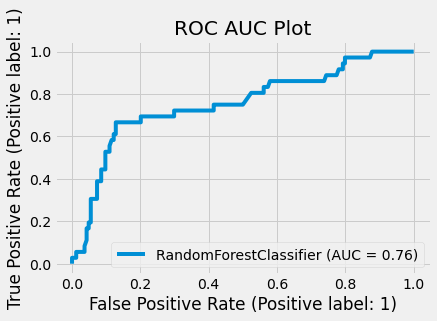

In [195]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_random.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

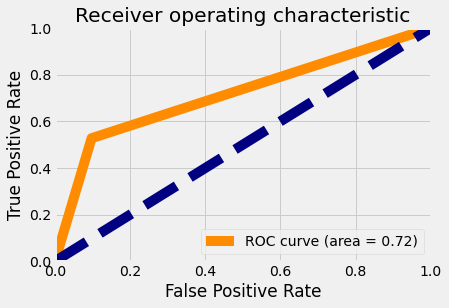

In [196]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test,pred_decision)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw=10, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Conclusion:

In [197]:
import numpy as np
a = np.array(y_test)
#predicted = np.array(ls.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':pred_decision},index=range(len(a)))
df_comp

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
195,1,0
196,0,0
197,0,0
198,0,1


# Model Saving:

In [200]:
import pickle
filename = 'insurance_claims_fraud.pkl'
pickle.dump(rf,open(filename,'wb'))